# Melanoma Classification : Preprocessing cum Model Development
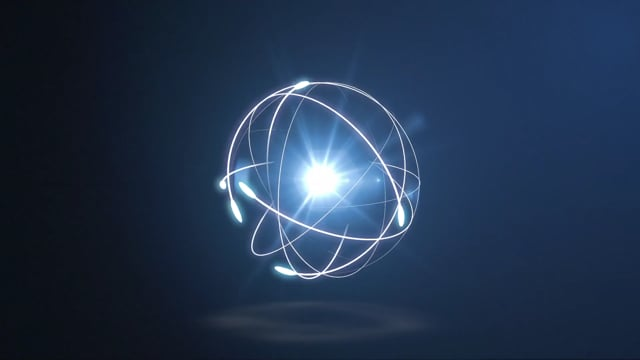 

## Notebook III of III

This notebook is the III one in my series of work in this competition. As always shout out to amazing kernel authors present here at kaggle!! I got loads of inspiration from them. I believe this is the best thing about the ML community. The extent of collaboration and guidance one can seek here is inexplicable!!

## Previous works : 
* Dataset preparation(Notebook I) : 
**https://www.kaggle.com/fireheart7/melanoma-a-story-in-3-parts-part-one**

* Exploratory Data Analysis(Notebook II) : 
**https://www.kaggle.com/fireheart7/melanoma-a-story-in-3-parts-part-two?scriptVersionId=38737733**

**Please consider upvoting if you find the overall series of notebooks useful! I have tried explaining the steps performed in profound details.**

Thank you! 
Let's begin!!~~

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(os.path.join(dirname))

/kaggle/input
/kaggle/input/melanoma-image-insights
/kaggle/input/siim-isic-melanoma-classification
/kaggle/input/siim-isic-melanoma-classification/test
/kaggle/input/siim-isic-melanoma-classification/tfrecords
/kaggle/input/siim-isic-melanoma-classification/jpeg
/kaggle/input/siim-isic-melanoma-classification/jpeg/test
/kaggle/input/siim-isic-melanoma-classification/jpeg/train
/kaggle/input/siim-isic-melanoma-classification/train


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

Upload the updated training and test csv obtained in the EDA notebook. There we filled the missing values and saved them in our custom dataset folder.

**Dataset : https://www.kaggle.com/fireheart7/melanoma-image-insights**

In [3]:
train = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/updated_training_file"))
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [4]:
test = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/updated_test_file"))
test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,torso
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33126 non-null  object 
 3   age_approx                     33126 non-null  float64
 4   anatom_site_general_challenge  33126 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     10982 non-null  object 
 1   patient_id                     10982 non-null  object 
 2   sex                            10982 non-null  object 
 3   age_approx                     10982 non-null  float64
 4   anatom_site_general_challenge  10982 non-null  object 
dtypes: float64(1), object(4)
memory usage: 429.1+ KB


In [7]:
train_image_stats_01 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_01"))
train_image_stats_02 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_02"))
train_image_stats_03 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_03"))
train_image_stats_04 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_04"))
train_image_stats_05 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_05"))
train_image_stats_06 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_06"))

print(train_image_stats_01.shape)
print(train_image_stats_02.shape)
print(train_image_stats_03.shape)
print(train_image_stats_04.shape)
print(train_image_stats_05.shape)
print(train_image_stats_06.shape)

(5000, 11)
(5000, 11)
(5000, 11)
(5000, 11)
(5000, 11)
(8126, 11)


In [8]:
train_image_statistics = pd.concat([train_image_stats_01, train_image_stats_02, train_image_stats_03,
                                   train_image_stats_04, train_image_stats_05, train_image_stats_06],
                                  ignore_index = True)
train_image_statistics.shape

(33126, 11)

In [9]:
train_image_statistics.head()

,image_name,path,rows,columns,channels,image_mean,image_standard_deviation,image_skewness,mean_red_value,mean_green_value,mean_blue_value
0,ISIC_2637011.jpg,/kaggle/input/siim-isic-melanoma-classificatio...,4000,6000,3,169.862452,41.270046,-0.129492,212.933646,138.914514,157.739197
1,ISIC_0015719.jpg,/kaggle/input/siim-isic-melanoma-classificatio...,4000,6000,3,171.084778,41.994142,-0.205430,217.279705,165.095320,130.879309
2,ISIC_0052212.jpg,/kaggle/input/siim-isic-melanoma-classificatio...,1053,1872,3,158.691048,37.364873,-0.551454,199.940391,130.224750,145.908002
3,ISIC_0068279.jpg,/kaggle/input/siim-isic-melanoma-classificatio...,1053,1872,3,80.342856,44.885518,0.453018,119.689502,62.614801,58.724265
4,ISIC_0074268.jpg,/kaggle/input/siim-isic-melanoma-classificatio...,4000,6000,3,183.955453,37.497829,-0.157002,226.269270,173.175601,152.421488


In [10]:
train_image_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   image_name                33126 non-null  object 
 1   path                      33126 non-null  object 
 2   rows                      33126 non-null  int64  
 3   columns                   33126 non-null  int64  
 4   channels                  33126 non-null  int64  
 5   image_mean                33126 non-null  float64
 6   image_standard_deviation  33126 non-null  float64
 7   image_skewness            33126 non-null  float64
 8   mean_red_value            33126 non-null  float64
 9   mean_green_value          33126 non-null  float64
 10  mean_blue_value           33126 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 2.8+ MB


In [11]:
train_dir = "/kaggle/input/siim-isic-melanoma-classification/jpeg/train/"

In [12]:
image_names = train_image_statistics["image_name"].values
random_images = [np.random.choice(image_names) for i in range(4)] # Generates a random sample from a given 1-D array
random_images 

['ISIC_7185381.jpg',
 'ISIC_5306841.jpg',
 'ISIC_2315448.jpg',
 'ISIC_7607101.jpg']

## Viewing Our Training Images : 

Let's plot some of our training images : 

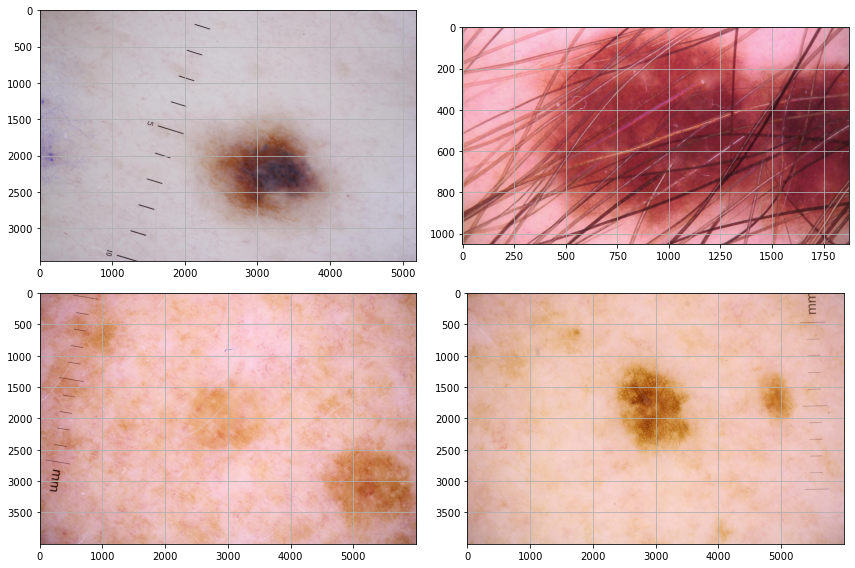

In [13]:
plt.figure(figsize = (12, 8))
for i in range(4) : 
    plt.subplot(2, 2, i + 1) 
    image = cv2.imread(os.path.join(train_dir, random_images[i]))
    # cv2 reads images in BGR format. Hence we convert it to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image, cmap = "gray")
    plt.grid(True)
# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout()

## Image Denoising :

Many image smoothing techniques like Gaussian Blurring, Median Blurring etc were good to some extent in removing small quantities of noise. In those techniques, we took a small neighbourhood around a pixel and performed some operations like gaussian weighted average, median of the values etc to replace the central element. In short, noise removal at a pixel was local to its neighbourhood.

There is a property of noise. **Noise is generally considered to be a random variable with zero mean.**

Suppose we hold a static camera to a certain location for a couple of seconds. This will give us plenty of frames, or a lot of images of the same scene. Then averaging all the frames, we compare the final result and first frame. Reduction in noise would be easily observed.

So idea is simple, we need a set of similar images to average out the noise. Considering a small window (say 5x5 window) in the image, chance is large that the same patch may be somewhere else in the image. Sometimes in a small neighbourhood around it. Hence, using these similar patches together averaging them can lead to an efficient denoised image.

This method is **Non-Local Means Denoising. It takes more time compared to blurring techniques, but the result are very satisfying.**

Denoising illustration :
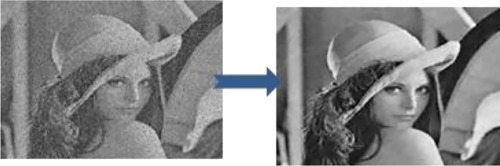 

## OpenCV implementation of the aforementioned approach :
cv2.fastNlMeansDenoisingColored() - Works on Colored images cv2.fastNlMeansDenoising() - Works on graysacle images

Common arguments are:

* h : parameter deciding filter strength. Higher h value removes noise better, but removes details of image also. (10 is ok)
* hForColorComponents : same as h, but for color images only. (normally same as h)
* templateWindowSize : should be odd. (recommended 7)
* searchWindowSize : should be odd. (recommended 21)

In [14]:
def non_local_means_denoising(image) : 
    denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    return denoised_image

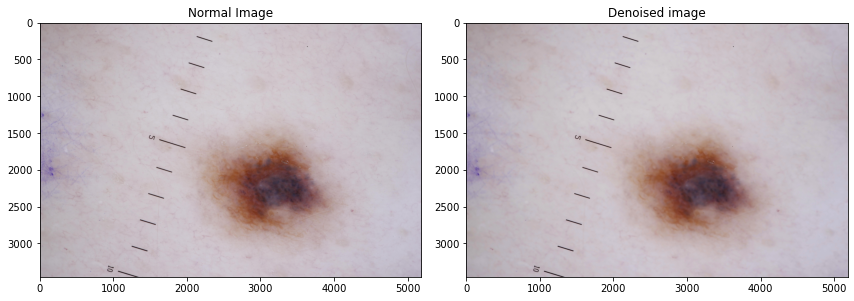

In [15]:
sample_image = cv2.imread(os.path.join(train_dir, random_images[0]))
# cv2 reads images in BGR format. Hence we convert it to RGB
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
denoised_image = non_local_means_denoising(sample_image)


plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
plt.imshow(sample_image, cmap = "gray")
plt.grid(False)
plt.title("Normal Image")

plt.subplot(1,2,2)  
plt.imshow(denoised_image, cmap = "gray")
plt.grid(False)
plt.title("Denoised image")    
# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout() 

## Local Histogram Pre-Processing

First of all, why can't we apply histogram equalization directly to an RGB image?
Histogram equalization is a non-linear process. Channel splitting and equalizing each channel separately is incorrect. *Equalization involves intensity values of the image, not the color components*. 

So for a simple RGB color image, histogram equalization cannot be applied directly on the channels.*It needs to be applied in such a way that the intensity values are equalized without disturbing the color balance of the image. So, the first step is to convert the color space of the image from RGB into one of the color spaces that separates intensity values from color components. Some of the possible options are HSV/HLS, YUV, YCbCr, etc. YCbCr is preferred as it is designed for digital images. Perform histogram equalization on the intensity plane Y. Now convert the resultant YCbCr image back to RGB.*

(Excerpt taken from :

https://prateekvjoshi.com/2013/11/22/histogram-equalization-of-rgb-images/ )

An illustration of histogram equalization : **Observe the intensity difference**
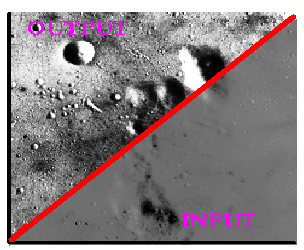 

Here the third one is actually local histogram equalization, where we equalize intensities inside a rolling window of certain dimension instead of the whole image at once.

In [16]:
def histogram_equalization(image) : 
    image_ycrcb = cv2.cvtColor(image, cv2.COLOR_RGB2YCR_CB)
    y_channel = image_ycrcb[:,:,0] # apply local histogram processing on this channel
    cr_channel = image_ycrcb[:,:,1]
    cb_channel = image_ycrcb[:,:,2]
    
    # Local histogram equalization
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8,8))
    equalized = clahe.apply(y_channel)
    equalized_image = cv2.merge([equalized, cr_channel, cb_channel])
    equalized_image = cv2.cvtColor(equalized_image, cv2.COLOR_YCR_CB2RGB)
    return equalized_image

In [17]:
equalized_image = histogram_equalization(denoised_image)

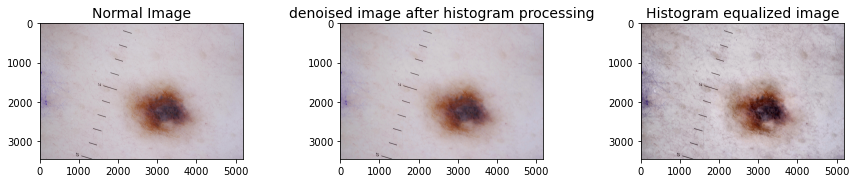

In [18]:
plt.figure(figsize = (12, 8))
plt.subplot(1,3,1)
plt.imshow(sample_image, cmap = "gray")
plt.grid(False)
plt.title("Normal Image", fontsize = 14)

plt.subplot(1,3,2)  
plt.imshow(denoised_image, cmap = "gray")
plt.grid(False)
plt.title("denoised image after histogram processing", fontsize = 14)

plt.subplot(1,3,3)  
plt.imshow(equalized_image, cmap = "gray")
plt.grid(False)
plt.title("Histogram equalized image", fontsize = 14)
# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout()

## Image Segmentation :

Is the technique of dividing or partitioning an image into parts, called segments. It is mostly useful for applications like image compression or object recognition, because for these types of applications, it is inefficient to process the whole image.

We will use **K-means clustering algorithm** to segment the images.
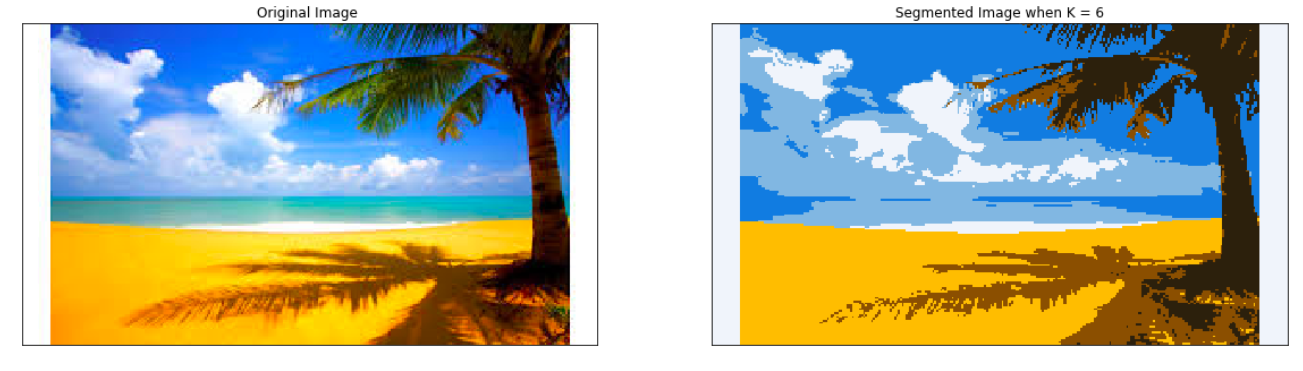       
K-Means Segmentation Approach Using OpenCV

* `samples` : It should be of np.float32 data type, and each feature should be put in a single column. Here we have 3 channels, so every channel features have to be in one column. So, total columns we have are 3, while we don't care about the number of rows, hence -1. So, shape : (-1, 3).

* `nclusters(K)` : Number of clusters required at end.

* `criteria` : It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:

Type of termination criteria. It has 3 flags as below:

1. `cv.TERM_CRITERIA_EPS` - stop the algorithm iteration if specified accuracy, epsilon, is reached.
2. `cv.TERM_CRITERIA_MAX_ITER` - stop the algorithm after the specified number of iterations, max_iter.
3. `cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER` - stop the iteration when any of the above condition is met.

*max_iter - An integer specifying maximum number of iterations. epsilon - Required accuracy*

* `attempts` : Flag to specify the number of times the algorithm is executed using different initial labellings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

* `flags` : This flag is used to specify how initial centers are taken. Normally two flags are used for this : cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

****

Output parameters :

* `compactness` : It is the sum of squared distance from each point to their corresponding centers.
* `labels` : This is the label array (same as 'code' in previous article) where each element marked '0','1'.....
* `centers` : This is array of centers of clusters.

In [19]:
def segmentation(image, k, attempts) : 
    vectorized = np.float32(image.reshape((-1, 3)))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
    res , label , center = cv2.kmeans(vectorized, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    segmented_image = res.reshape((image.shape))
    return segmented_image

Text(0.5, 1.0, 'de Noised Image')

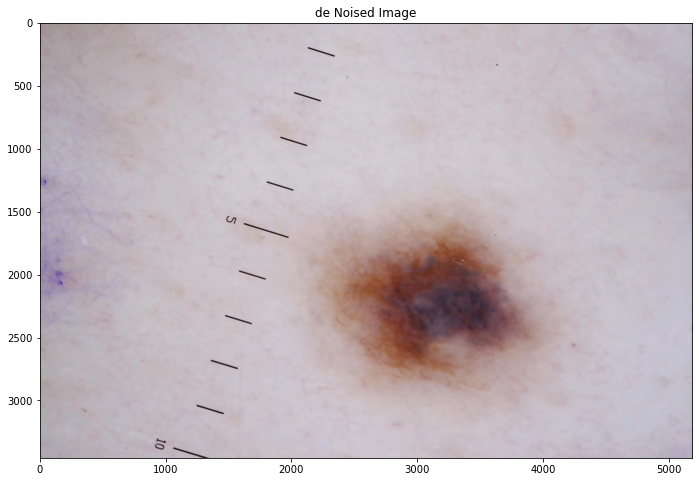

In [20]:
plt.figure(figsize = (12, 8))
plt.subplot(1,1,1)
plt.imshow(denoised_image, cmap = "gray")
plt.grid(False)
plt.title("de Noised Image")

Text(0.5, 1.0, 'Segmented Image with k = 5')

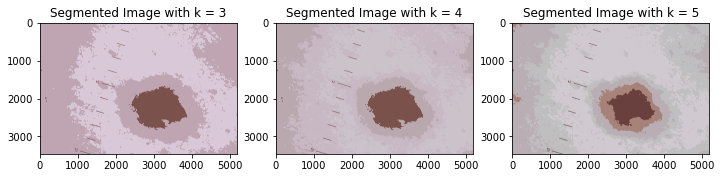

In [21]:
plt.figure(figsize = (12, 8))
segmented_image = segmentation(denoised_image, 3, 10) # k = 3, attempt = 10
plt.subplot(1,3,1)
plt.imshow(segmented_image, cmap = "gray")
plt.grid(False)
plt.title("Segmented Image with k = 3")

segmented_image = segmentation(denoised_image, 4, 10) # k = 4, attempt = 10
plt.subplot(1,3,2)
plt.imshow(segmented_image, cmap = "gray")
plt.grid(False)
plt.title("Segmented Image with k = 4")

segmented_image = segmentation(denoised_image, 5, 10) # k = 5, attempt = 10
plt.subplot(1,3,3)
plt.imshow(segmented_image, cmap = "gray")
plt.grid(False)
plt.title("Segmented Image with k = 5")

The notebook will be updated here on!
Stay tuned and good luck!